In [1]:
import numpy as np

import tsplib95
import networkx as nx

import os
import pandas as pd
import gilsrvnd
import DBMEA
import grasp

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression



In [2]:
# get all files from the instances folder
files = os.listdir('instances')

['line_100_0.tsp',
 'line_100_1.tsp',
 'line_100_2.tsp',
 'line_100_3.tsp',
 'line_100_4.tsp',
 'line_100_5.tsp',
 'line_100_6.tsp',
 'line_100_7.tsp',
 'line_100_8.tsp',
 'line_100_9.tsp',
 'line_10_0.tsp',
 'line_10_1.tsp',
 'line_10_2.tsp',
 'line_10_3.tsp',
 'line_10_4.tsp',
 'line_10_5.tsp',
 'line_10_6.tsp',
 'line_10_7.tsp',
 'line_10_8.tsp',
 'line_10_9.tsp',
 'line_20_0.tsp',
 'line_20_1.tsp',
 'line_20_2.tsp',
 'line_20_3.tsp',
 'line_20_4.tsp',
 'line_20_5.tsp',
 'line_20_6.tsp',
 'line_20_7.tsp',
 'line_20_8.tsp',
 'line_20_9.tsp',
 'line_30_0.tsp',
 'line_30_1.tsp',
 'line_30_2.tsp',
 'line_30_3.tsp',
 'line_30_4.tsp',
 'line_30_5.tsp',
 'line_30_6.tsp',
 'line_30_7.tsp',
 'line_30_8.tsp',
 'line_30_9.tsp',
 'line_40_0.tsp',
 'line_40_1.tsp',
 'line_40_2.tsp',
 'line_40_3.tsp',
 'line_40_4.tsp',
 'line_40_5.tsp',
 'line_40_6.tsp',
 'line_40_7.tsp',
 'line_40_8.tsp',
 'line_40_9.tsp',
 'line_50_0.tsp',
 'line_50_1.tsp',
 'line_50_2.tsp',
 'line_50_3.tsp',
 'line_50_4.tsp',


In [3]:
# create a dict that will be turned into a dataframe later the keys should be:
# file, n, m, ratio1, ratio2, density, min, max, mean, median, Q25, Q75, std, var
datadict = {'file': [], 'n': [], 'm': [], 'ratio1': [], 'ratio2': [], 'density': [], 'min': [], 'max': [], 'mean': [], 'std': [], 'var': []}

In [4]:
# for all files in the instances folder make a graph and get information such as mean, std, min, max
for f in files:
    problem = tsplib95.load('Instances/' + f)
    graph = problem.get_graph()
    dist_matrix = nx.to_numpy_matrix(graph)

    # get the number of nodes
    n = len(graph.nodes)

    # get the number of edges
    m = len(graph.edges)

    # get the ratio of nodes to edges and vice versa
    ratio1 = n/m
    ratio2 = m/n
    # get the density of the graph
    density = nx.density(graph)

    # get the min, max, mean, median, Q25, Q75, std, var of the distances
    emin = np.min(dist_matrix)
    emax = np.max(dist_matrix)

    mean = np.mean(dist_matrix)


    #Q25 = np.quantile(dist_matrix, 0.25)
    #Q75 = np.quantile(dist_matrix, 0.75)
    std = np.std(dist_matrix)

    var = np.var(dist_matrix)


    # add the information to the dict
    datadict['file'].append(f)
    datadict['n'].append(n)
    datadict['m'].append(m)
    datadict['ratio1'].append(ratio1)
    datadict['ratio2'].append(ratio2)
    datadict['density'].append(density)
    datadict['min'].append(emin)
    datadict['max'].append(emax)
    datadict['mean'].append(mean)

    #datadict['Q25'].append(Q25)
    #datadict['Q75'].append(Q75)
    datadict['std'].append(std)
    datadict['var'].append(var)

    print(f'{f} done')


line_100_0.tsp done
line_100_1.tsp done
line_100_2.tsp done
line_100_3.tsp done
line_100_4.tsp done
line_100_5.tsp done
line_100_6.tsp done
line_100_7.tsp done
line_100_8.tsp done
line_100_9.tsp done
line_10_0.tsp done
line_10_1.tsp done
line_10_2.tsp done
line_10_3.tsp done
line_10_4.tsp done
line_10_5.tsp done
line_10_6.tsp done
line_10_7.tsp done
line_10_8.tsp done
line_10_9.tsp done
line_20_0.tsp done
line_20_1.tsp done
line_20_2.tsp done
line_20_3.tsp done
line_20_4.tsp done
line_20_5.tsp done
line_20_6.tsp done
line_20_7.tsp done
line_20_8.tsp done
line_20_9.tsp done
line_30_0.tsp done
line_30_1.tsp done
line_30_2.tsp done
line_30_3.tsp done
line_30_4.tsp done
line_30_5.tsp done
line_30_6.tsp done
line_30_7.tsp done
line_30_8.tsp done
line_30_9.tsp done
line_40_0.tsp done
line_40_1.tsp done
line_40_2.tsp done
line_40_3.tsp done
line_40_4.tsp done
line_40_5.tsp done
line_40_6.tsp done
line_40_7.tsp done
line_40_8.tsp done
line_40_9.tsp done
line_50_0.tsp done
line_50_1.tsp done
li

In [5]:
# turn the dict into a dataframe
df = pd.DataFrame.from_dict(datadict)
df

,file,n,m,ratio1,ratio2,density,min,max,mean,std,var
0,line_100_0.tsp,100,5050,0.019802,50.5,1.020202,0.0,997.0,360.837000,258.203016,66668.797631
1,line_100_1.tsp,100,5050,0.019802,50.5,1.020202,0.0,989.0,333.304800,237.244690,56285.043097
2,line_100_2.tsp,100,5050,0.019802,50.5,1.020202,0.0,978.0,342.882000,246.103891,60567.125276
3,line_100_3.tsp,100,5050,0.019802,50.5,1.020202,0.0,980.0,319.054400,227.943525,51958.250641
4,line_100_4.tsp,100,5050,0.019802,50.5,1.020202,0.0,983.0,356.094400,253.851952,64440.813489
...,...,...,...,...,...,...,...,...,...,...,...
95,line_90_5.tsp,90,4095,0.021978,45.5,1.022472,0.0,889.0,319.538272,226.908988,51487.689029
96,line_90_6.tsp,90,4095,0.021978,45.5,1.022472,0.0,888.0,297.687407,211.917802,44909.154632
97,line_90_7.tsp,90,4095,0.021978,45.5,1.022472,0.0,862.0,249.932840,181.712429,33019.406847
98,line_90_8.tsp,90,4095,0.021978,45.5,1.022472,0.0,889.0,316.810123,226.894830,51481.263947


In [6]:
# add columns for the algorithms GRASP, GILS and DBMEA
df['GILS_cost'] = 0
df['GILS_time'] = 0
df['GRASP_cost'] = 0
df['GRASP_time'] = 0
df['DBMEA_cost'] = 0
df['DBMEA_time'] = 0

In [7]:
df

,file,n,m,ratio1,ratio2,density,min,max,mean,std,var,GILS_cost,GILS_time,GRASP_cost,GRASP_time,DBMEA_cost,DBMEA_time
0,line_100_0.tsp,100,5050,0.019802,50.5,1.020202,0.0,997.0,360.837000,258.203016,66668.797631,0,0,0,0,0,0
1,line_100_1.tsp,100,5050,0.019802,50.5,1.020202,0.0,989.0,333.304800,237.244690,56285.043097,0,0,0,0,0,0
2,line_100_2.tsp,100,5050,0.019802,50.5,1.020202,0.0,978.0,342.882000,246.103891,60567.125276,0,0,0,0,0,0
3,line_100_3.tsp,100,5050,0.019802,50.5,1.020202,0.0,980.0,319.054400,227.943525,51958.250641,0,0,0,0,0,0
4,line_100_4.tsp,100,5050,0.019802,50.5,1.020202,0.0,983.0,356.094400,253.851952,64440.813489,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,line_90_5.tsp,90,4095,0.021978,45.5,1.022472,0.0,889.0,319.538272,226.908988,51487.689029,0,0,0,0,0,0
96,line_90_6.tsp,90,4095,0.021978,45.5,1.022472,0.0,888.0,297.687407,211.917802,44909.154632,0,0,0,0,0,0
97,line_90_7.tsp,90,4095,0.021978,45.5,1.022472,0.0,862.0,249.932840,181.712429,33019.406847,0,0,0,0,0,0
98,line_90_8.tsp,90,4095,0.021978,45.5,1.022472,0.0,889.0,316.810123,226.894830,51481.263947,0,0,0,0,0,0


In [10]:
# create a function that can be used via df.apply that runs the 3 algorithmms on the given file from the row

def benchmark(row):
    # get the file
    f = row['file']
    f = 'Instances/' + f

    _, gils_cost, gils_time = gilsrvnd.run(f)
    _, grasp_cost, grasp_time = grasp.run(f)
    _, dbmea_cost, dbmea_time = DBMEA.run(f)

    # add the results to the dataframe

    row['GRASP_cost'] = grasp_cost
    row['GRASP_time'] = grasp_time

    row['GILS_cost'] = gils_cost
    row['GILS_time'] = gils_time
    row['DBMEA_cost'] = dbmea_cost
    row['DBMEA_time'] = dbmea_time

    print(f'{f} done')

    return row


In [11]:
# run the benchmark function on all rows
df = df.apply(benchmark, axis=1)


Instances/line_100_0.tsp done
Instances/line_100_1.tsp done
Instances/line_100_2.tsp done
Instances/line_100_3.tsp done
Instances/line_100_4.tsp done
Instances/line_100_5.tsp done
Instances/line_100_6.tsp done
Instances/line_100_7.tsp done
Instances/line_100_8.tsp done
Instances/line_100_9.tsp done
Instances/line_10_0.tsp done
Instances/line_10_1.tsp done
Instances/line_10_2.tsp done
Instances/line_10_3.tsp done
Instances/line_10_4.tsp done
Instances/line_10_5.tsp done
Instances/line_10_6.tsp done
Instances/line_10_7.tsp done
Instances/line_10_8.tsp done
Instances/line_10_9.tsp done
Instances/line_20_0.tsp done
Instances/line_20_1.tsp done
Instances/line_20_2.tsp done
Instances/line_20_3.tsp done
Instances/line_20_4.tsp done
Instances/line_20_5.tsp done
Instances/line_20_6.tsp done
Instances/line_20_7.tsp done
Instances/line_20_8.tsp done
Instances/line_20_9.tsp done
Instances/line_30_0.tsp done
Instances/line_30_1.tsp done
Instances/line_30_2.tsp done
Instances/line_30_3.tsp done
Inst

In [12]:
# save the dataframe as a csv
#df.to_csv('data_line.csv', index=False)
#matrix = df.copy()
#c = ["GILS_cost", "GRASP_cost", "DBMEA_cost"]
#matrix[c] = matrix[c].apply(lambda x: pd.to_numeric(x, errors='coerce'))

#matrix['Min_val'] = matrix[c].min(axis=1)
#matrix['Min_col'] = matrix[c].idxmin(axis=1)
#save the dataframe as a csv
#matrix.to_csv('matrix_line.csv', index=False)

In [18]:
# train a model on the data that predicts gils
# get the data
df = pd.read_csv('matrix_all.csv')
df

,file,n,m,ratio1,ratio2,density,min,max,mean,std,var,GILS_cost,GILS_time,GRASP_cost,GRASP_time,DBMEA_cost,DBMEA_time,Min_val,Min_col
0,att48.tsp,48,1176,0.040816,24.5,1.042553,0.0,2662.0,1017.559896,627.598414,3.938798e+05,226229.0,6.474685,301702.0,0.026019,207771.0,5.288543,207771.0,DBMEA_cost
1,berlin52.tsp,52,1378,0.037736,26.5,1.039216,0.0,1716.0,564.188609,345.722052,1.195237e+05,145419.0,6.054587,191072.0,0.031533,143278.0,5.374160,143278.0,DBMEA_cost
2,brazil58.tsp,58,1711,0.033898,29.5,1.035088,0.0,8700.0,2094.914388,1426.139588,2.033874e+06,532454.0,8.013889,709540.0,0.043413,535150.0,9.045840,532454.0,GILS_cost
3,burma14.tsp,14,105,0.133333,7.5,1.153846,1.0,1261.0,442.612245,272.511473,7.426250e+04,16457.0,0.156218,18393.0,0.001000,16457.0,0.082072,16457.0,GILS_cost
4,dantzig42.tsp,42,903,0.046512,21.5,1.048780,0.0,192.0,72.295918,43.481585,1.890648e+03,12392.0,2.579336,14523.0,0.016044,12256.0,3.325098,12256.0,DBMEA_cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,line_90_5.tsp,90,4095,0.021978,45.5,1.022472,0.0,889.0,319.538272,226.908988,5.148769e+04,55730.0,35.477098,157350.0,0.233857,57558.0,36.326975,55730.0,GILS_cost
336,line_90_6.tsp,90,4095,0.021978,45.5,1.022472,0.0,888.0,297.687407,211.917802,4.490915e+04,48884.0,30.191444,128976.0,0.232372,45916.0,37.348990,45916.0,DBMEA_cost
337,line_90_7.tsp,90,4095,0.021978,45.5,1.022472,0.0,862.0,249.932840,181.712429,3.301941e+04,51464.0,28.821121,124368.0,0.232510,49038.0,44.483338,49038.0,DBMEA_cost
338,line_90_8.tsp,90,4095,0.021978,45.5,1.022472,0.0,889.0,316.810123,226.894830,5.148126e+04,60845.0,28.282006,123373.0,0.231058,65825.0,39.745050,60845.0,GILS_cost


In [16]:
# concat df and df2
#df = pd.concat([df, df2])


,file,n,m,ratio1,ratio2,density,min,max,mean,std,var,GILS_cost,GILS_time,GRASP_cost,GRASP_time,DBMEA_cost,DBMEA_time,Min_val,Min_col
0,att48.tsp,48,1176,0.040816,24.5,1.042553,0.0,2662.0,1017.559896,627.598414,3.938798e+05,226229.0,6.474685,301702.0,0.026019,207771.0,5.288543,207771.0,DBMEA_cost
1,berlin52.tsp,52,1378,0.037736,26.5,1.039216,0.0,1716.0,564.188609,345.722052,1.195237e+05,145419.0,6.054587,191072.0,0.031533,143278.0,5.374160,143278.0,DBMEA_cost
2,brazil58.tsp,58,1711,0.033898,29.5,1.035088,0.0,8700.0,2094.914388,1426.139588,2.033874e+06,532454.0,8.013889,709540.0,0.043413,535150.0,9.045840,532454.0,GILS_cost
3,burma14.tsp,14,105,0.133333,7.5,1.153846,1.0,1261.0,442.612245,272.511473,7.426250e+04,16457.0,0.156218,18393.0,0.001000,16457.0,0.082072,16457.0,GILS_cost
4,dantzig42.tsp,42,903,0.046512,21.5,1.048780,0.0,192.0,72.295918,43.481585,1.890648e+03,12392.0,2.579336,14523.0,0.016044,12256.0,3.325098,12256.0,DBMEA_cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,line_90_5.tsp,90,4095,0.021978,45.5,1.022472,0.0,889.0,319.538272,226.908988,5.148769e+04,55730.0,35.477098,157350.0,0.233857,57558.0,36.326975,55730.0,GILS_cost
96,line_90_6.tsp,90,4095,0.021978,45.5,1.022472,0.0,888.0,297.687407,211.917802,4.490915e+04,48884.0,30.191444,128976.0,0.232372,45916.0,37.348990,45916.0,DBMEA_cost
97,line_90_7.tsp,90,4095,0.021978,45.5,1.022472,0.0,862.0,249.932840,181.712429,3.301941e+04,51464.0,28.821121,124368.0,0.232510,49038.0,44.483338,49038.0,DBMEA_cost
98,line_90_8.tsp,90,4095,0.021978,45.5,1.022472,0.0,889.0,316.810123,226.894830,5.148126e+04,60845.0,28.282006,123373.0,0.231058,65825.0,39.745050,60845.0,GILS_cost


In [19]:
# check value counts
df['Min_col'].value_counts()

Min_col
DBMEA_cost    186
GILS_cost     154
Name: count, dtype: int64

In [20]:
# get the features
X = df[['n', 'm', 'ratio1', 'ratio2', 'density', 'min', 'max', 'mean', 'std', 'var']]
y = df['Min_col']



In [21]:
# train test split


X_train, X_test, y_train, y_test = train_test_split(X, y)



In [22]:
# train a random forest

rf = RandomForestClassifier()
rf.fit(X_train, y_train)



RandomForestClassifier()

In [23]:
# get the predictions
y_pred = rf.predict(X_test)



In [24]:
# get the accuracy
accuracy_score(y_test, y_pred)


0.5176470588235295

In [25]:
# get the confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(25, 22, 19, 19)

In [26]:
# predict the entire dataset
y_pred = rf.predict(X)


In [27]:
# get the accuracy
accuracy_score(y, y_pred)


0.8794117647058823

In [28]:
# get the confusion matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
(tn, fp, fn, tp)

(164, 22, 19, 135)

In [29]:
# now train a logistic regression

lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [30]:
# get the predictions
y_pred = lr.predict(X_test)


In [31]:
# get the accuracy
accuracy_score(y_test, y_pred)

0.4470588235294118

In [32]:
# get the confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(0, 47, 0, 38)

In [33]:
#get the predictions for the entire dataset
y_pred = lr.predict(X)


In [34]:
# get the accuracy
accuracy_score(y, y_pred)

0.45294117647058824

In [35]:
# get the confusion matrix

In [36]:
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
(tn, fp, fn, tp)

(0, 186, 0, 154)

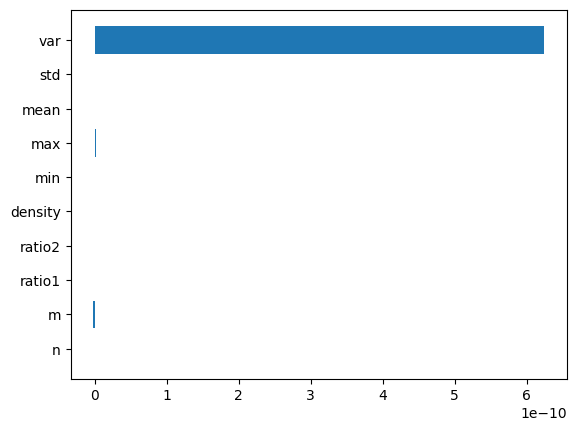

In [37]:
# display the logistic regression
import matplotlib.pyplot as plt
plt.barh(X.columns, lr.coef_[0])
plt.show()

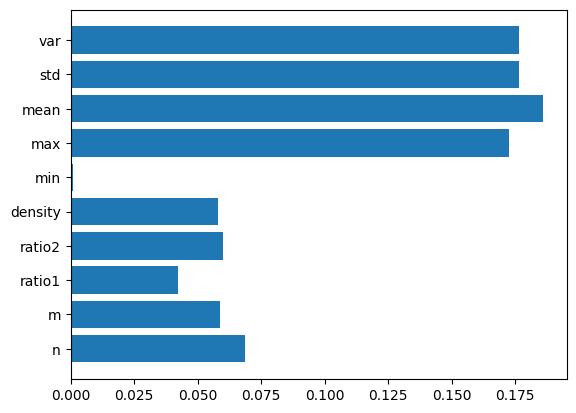

In [38]:
# display the random forest
plt.barh(X.columns, rf.feature_importances_)
plt.show()